Decision Tree Classifier on test samples

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
# Import the data file
df = pd.read_csv('play_football.csv')
print(df)

     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5      rainy        cool   normal   True   no
6   overcast        cool   normal   True  yes
7      sunny        mild     high  False   no
8      sunny        cool   normal  False  yes
9      rainy        mild   normal  False  yes
10     sunny        mild   normal   True  yes
11  overcast        mild     high   True  yes
12  overcast         hot   normal  False  yes
13     rainy        mild     high   True   no


In [3]:
# Separate the features and the target
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [4]:
# Convert to one-hot encoding
data_encoded = pd.get_dummies(data).astype(int)

In [5]:
# Initiate a decision tree model (criterion: entrophy)
dt = DecisionTreeClassifier(criterion='entropy')

In [6]:
# Split the train and test data (train:67%, test:33%)
X_train, X_test, Y_train, Y_test = train_test_split(data_encoded, target, test_size=0.33, random_state=69)

In [7]:
# Concate the feature and class
train_data = pd.concat([X_train, Y_train], axis = 1)
test_data = pd.concat([X_test, Y_test], axis=1)

In [8]:
# Percentage distribution in target column
print("\nPercentage distribution of target in original data")
print("yes\t",df['Play'].value_counts().get('yes')/len(df)*100)
print("no\t",df['Play'].value_counts().get('no')/len(df)*100)

print("\nPercentage distribution of target in train data")
print("yes\t",train_data['Play'].value_counts().get('yes')/len(train_data)*100)
print("no\t",train_data['Play'].value_counts().get('no')/len(train_data)*100)

print("\nPercentage distribution of target in test data")
print("yes\t",test_data['Play'].value_counts().get('yes')/len(test_data)*100)
print("no\t",test_data['Play'].value_counts().get('no')/len(test_data)*100)


Percentage distribution of target in original data
yes	 64.28571428571429
no	 35.714285714285715

Percentage distribution of target in train data
yes	 66.66666666666666
no	 33.33333333333333

Percentage distribution of target in test data
yes	 60.0
no	 40.0


In [9]:
# Train the decision tree
dt = dt.fit(X_train, Y_train)

In [10]:
# Predict on test dataset
Y_predict = dt.predict(X_test)

In [11]:
# Display the test and predicted data
print("Ground truth of test data\n",Y_test)
print("\nPredicted Data\n",Y_predict)

Ground truth of test data
 3    yes
8    yes
2    yes
5     no
0     no
Name: Play, dtype: object

Predicted Data
 ['no' 'yes' 'yes' 'yes' 'no']


In [12]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_predict)

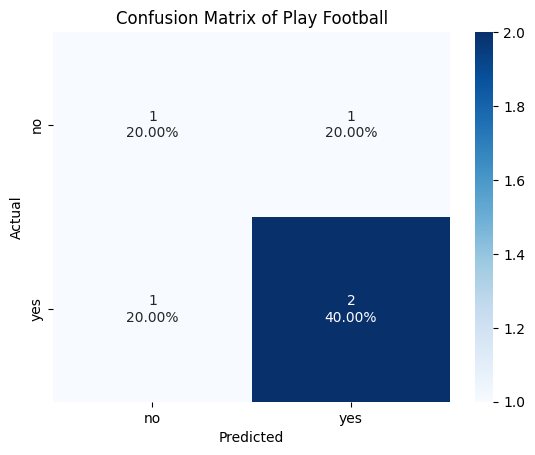

In [13]:
# Visualize confusion matrix

# Create custom level with count and percentage
count = ["{0:.0f}".format(value) for value in cm.flatten()]
percent = ["{0:0.2f}%".format(value*100) for value in cm.flatten()/np.sum(cm)]
labels = [f"{x1}\n{x2}" for x1, x2 in zip(count,percent)]
labels = np.asarray(labels).reshape(2,2)

# Define tick label
tick_label = ['no','yes']
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=tick_label, yticklabels=tick_label)

plt.title('Confusion Matrix of Play Football')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Generate classification report
report = classification_report(Y_test,Y_predict)
print(report)

              precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



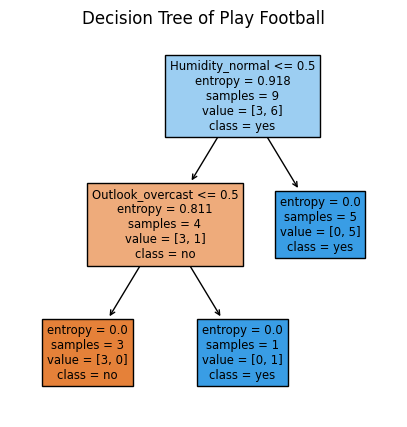

In [15]:
# Plot the decision tree
plt.figure(figsize=(5,5))
tree.plot_tree(dt, feature_names=data_encoded.columns, class_names=dt.classes_, filled=True)
plt.title('Decision Tree of Play Football')
plt.show()